# Elaborated by 2nd year students at **Ecole Polytechnique de Tunisie** :
*   **ALOUANI Med Amine**
*   **JAADARI Fadi**
*   **BENABDESSLEM Med Rayen**

# **Image Denoising using Wavelet Transform in Python**

# Importing necessary libraries in python

First off we'll be importing different libraries to work with , namely : 


*   The **matplotlib.pyplot** module provides a convenient interface for creating plots and charts.
*   The **skimage.restoration** module provides functions for image restoration, such as **denoise_wavelet** for wavelet-based denoising and **estimate_sigma** for estimating the noise level in an image.

*   The **skimage.util** module provides various utility functions, including **random_noise** for adding random noise to an image.

*   The **skimage.metrics** module provides functions for evaluating image quality, such as **peak_signal_noise_ratio (PSNR)** for calculating the ratio of the peak signal power to the noise power in an image.
*   The **skimage.io** module provides functions for reading and writing image files, such as imread for reading image files into NumPy arrays.




In [54]:
import matplotlib.pyplot as plt
from skimage.restoration import (denoise_wavelet,estimate_sigma)
from skimage.util import random_noise
from skimage.metrics import peak_signal_noise_ratio
import skimage.io
import numpy as np

# Grayscale Images



*   The first line reads in a grayscale image from a file called **"lena_gray.bmp"** using the **imread()** function from the **skimage.io** module. The image is loaded into a NumPy array called img.

*   Then we convert the pixel values of the image from an 8-bit unsigned integer format to a floating-point format using the **img_as_float()** function from the skimage module. This is a common step in image processing to ensure that the pixel values are in a **range of 0 to 1**, which is easier to work with mathematically.

*   Then we define a variable called **sigma** and sets its value to **0.1**. This value is used to specify the **standard deviation** of the Gaussian noise that will be added to the image in the next line.
*   Then we  add the **Gaussian noise** to the image using the **random_noise()** function from the **skimage.util** module. The var parameter specifies the **variance** of the noise, which is calculated from σ**2.


*   We finally estimate the standard deviation of the noise in the noisy image using the **estimate_sigma()** function from the **skimage.restoration** module. The **average_sigmas** parameter is set to **True**, which computes a global noise level estimate by averaging over all pixels.




In [55]:
img = skimage.io.imread("lena_gray.bmp")
img = skimage.img_as_float(img)
sigma = 0.1 #Noise std 
imgn = random_noise(img,var= sigma**2)
sigma_est = estimate_sigma(imgn,average_sigmas=True)

Next we'll be using two techniques of denoise wavelet : First one is based on **BayesShrink** and the second is based on **VisuShrink**

 
We'll explain the different parameters to denoise wavelet :
The **denoise_wavelet()** is a function from the **skimage.restoration** module that performs wavelet-based denoising on the noisy image with the following parameters:

*   **imgn**: The noisy input image
*   **method='BayesShrink'**: The denoising method to use, this parameter determines the type of thresholding that is applied to the wavelet coefficients of the image to remove the noise. BayesShrink applies a **Bayesian thresholding** method to the wavelet coefficients
*   **mode='soft'**: The thresholding mode to use for the wavelet coefficients
*   **wavelet_levels=3**: The number of wavelet decomposition levels to use, A **higher number** of levels results in **more detail** information being retained in the denoised image.
*   **wavelet='bior6.8'**: The type of wavelet to use, in this code, the biorthogonal 6.8 wavelet is used.
*   **rescale_sigma=True**: Whether to rescale the noise level for each wavelet subband



In [56]:

#Denoising using Bayes
img_bayes = denoise_wavelet(imgn,method='BayesShrink',mode ='soft',
                            wavelet_levels=3,wavelet='bior6.8',
                            rescale_sigma=True)


/usr/local/lib/python3.8/dist-packages/skimage/restoration/_denoise.py:928: UserWarning: Wavelet thresholding was designed for use with orthogonal wavelets. For nonorthogonal wavelets such as bior6.8,results are likely to be suboptimal.
  out = _wavelet_threshold(image, wavelet=wavelet, method=method,



*   **imgn**: The noisy input image
*   **method='VisuShrink'**: The denoising method to use,VisuShrink applies a **non-linear thresholding** method based on the estimated noise level of the image.
*   **mode='soft'**: The thresholding mode to use for the wavelet coefficients
*   **sigma=sigma_est/3**: The threshold level for the wavelet coefficients, which is set to one-third of the estimated noise level
*   **wavelet_levels=5**: The number of wavelet decomposition levels to use, A **higher number** of levels results in **more detail** information being retained in the denoised image.
*   **wavelet='bior6.8'**: The type of wavelet to use, in this code, the biorthogonal 6.8 wavelet is used.

In [57]:
#Denoising using VisuShrink
img_visushrink = denoise_wavelet(imgn,method='VisuShrink',mode ='soft',
                                 sigma=sigma_est/3,wavelet_levels=5,
                                 wavelet='bior6.8',rescale_sigma=True)

/usr/local/lib/python3.8/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 5 is too high: all coefficients will experience boundary effects.
  warnings.warn(


## **Results**:

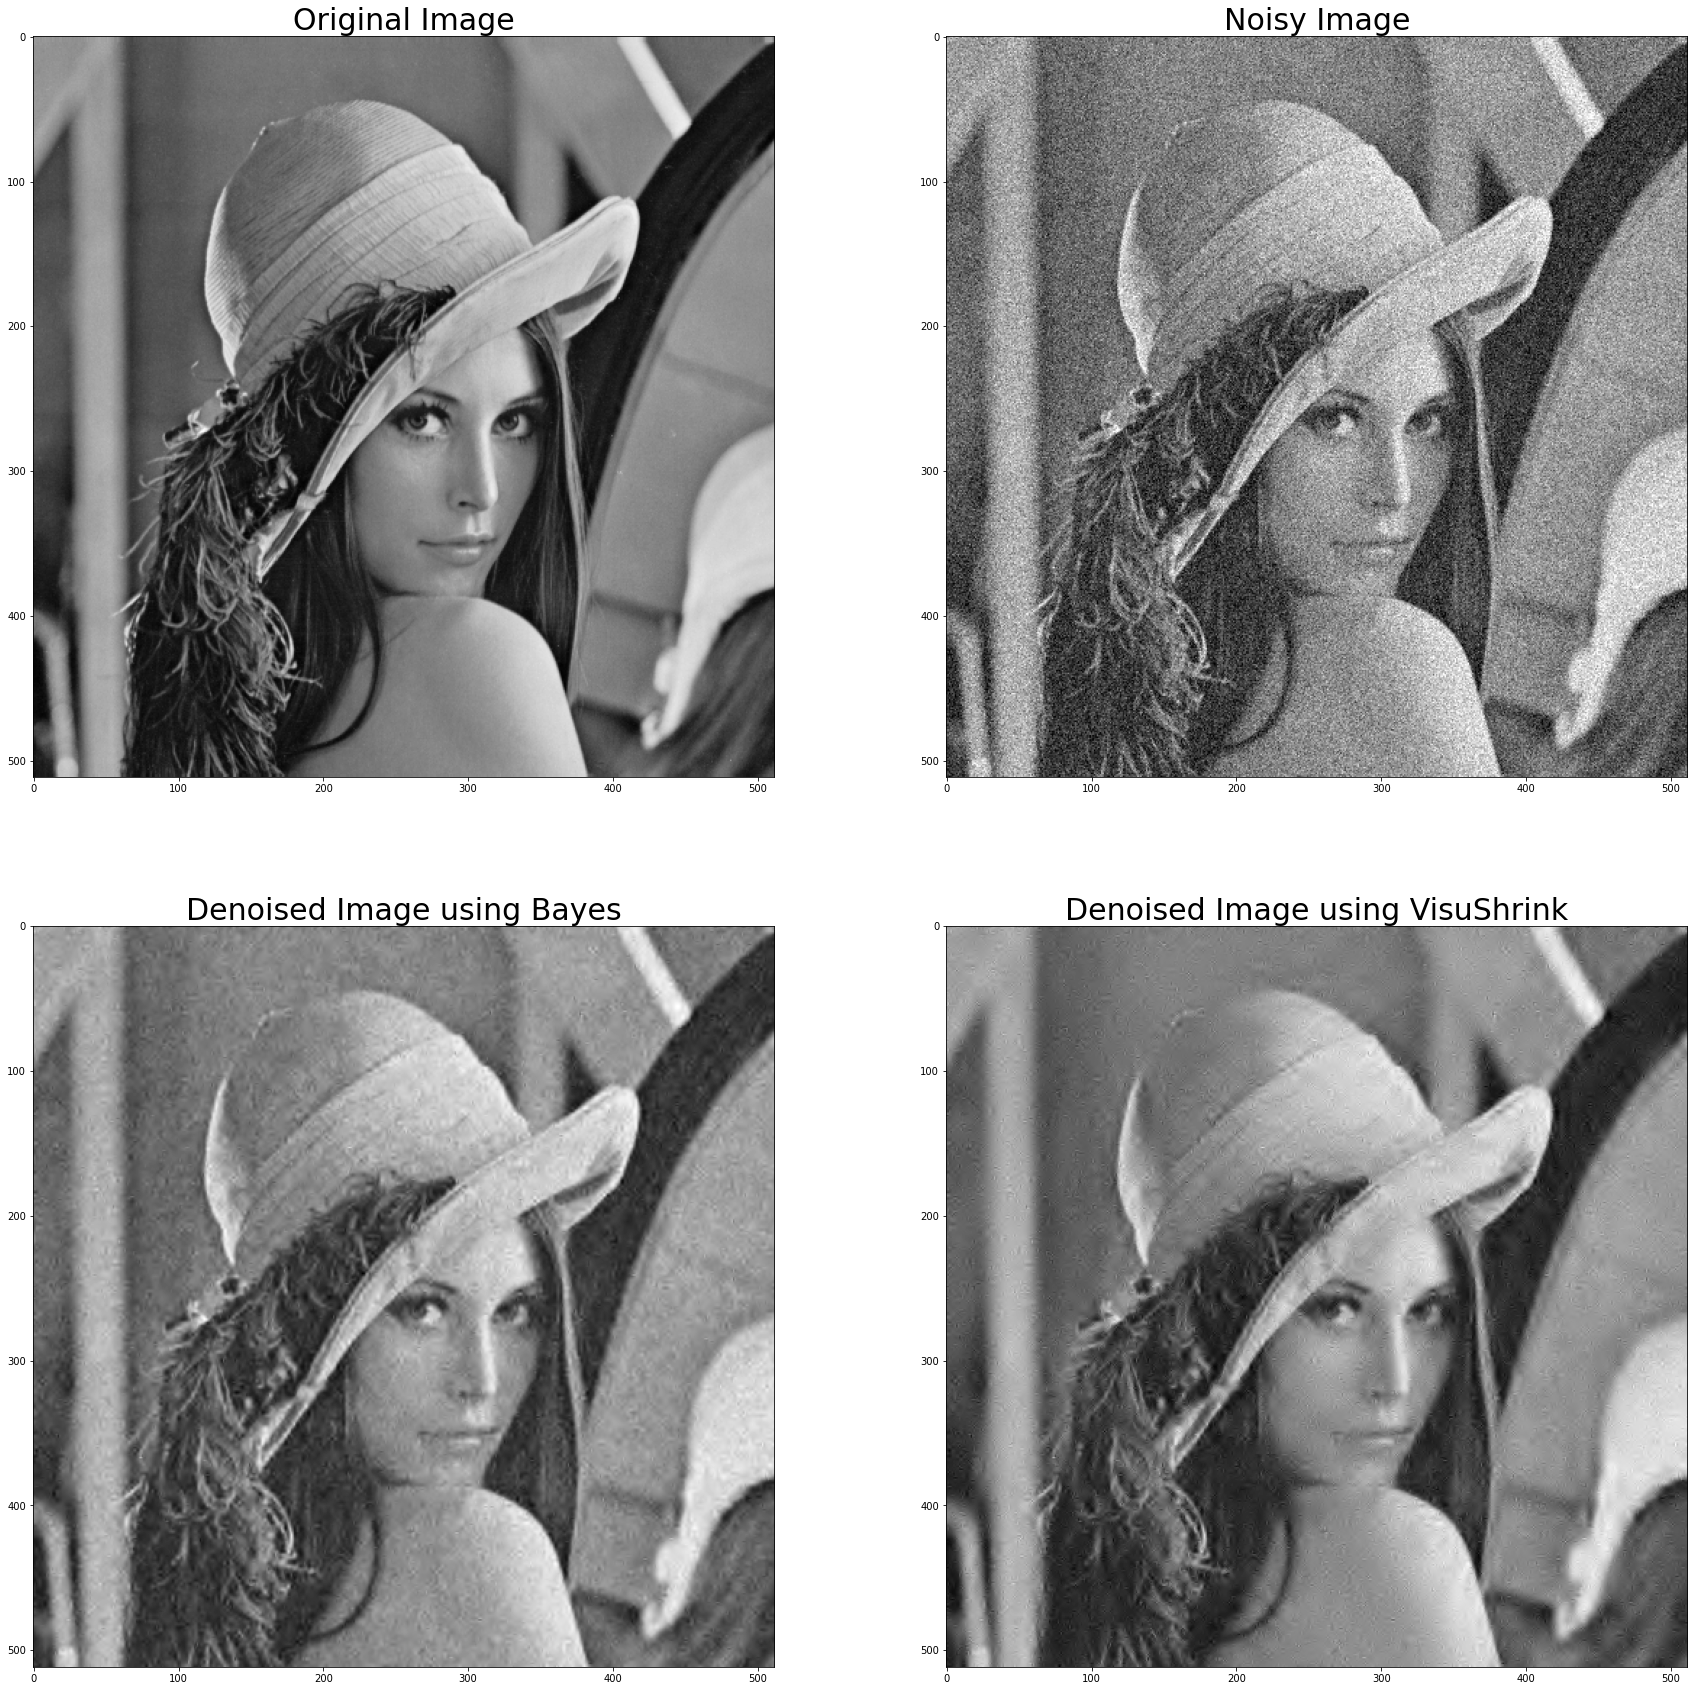

In [58]:
#Plotting Images
plt.figure(figsize=(30,30))

plt.subplot(2,2,1)
plt.imshow(img,cmap=plt.cm.gray)
plt.title('Original Image',fontsize=30)

plt.subplot(2,2,2)
plt.imshow(imgn,cmap=plt.cm.gray)
plt.title('Noisy Image',fontsize=30)

plt.subplot(2,2,3)
plt.imshow(img_bayes,cmap=plt.cm.gray)
plt.title('Denoised Image using Bayes',fontsize=30)

plt.subplot(2,2,4)
plt.imshow(img_visushrink,cmap=plt.cm.gray)
plt.title('Denoised Image using VisuShrink',fontsize=30)

plt.show()


We can clearly notice a difference between the noised image and the denoised images.

The results of the denoising are evaluated using the **peak signal-to-noise ratio** (**PSNR**), which measures the quality of the denoised image by comparing it to the original noise-free image.

**The higher** the PSNR value, **the better** the quality of the denoised image. The PSNR is measured in decibels (**dB**), with higher values indicating a higher fidelity to the original image.
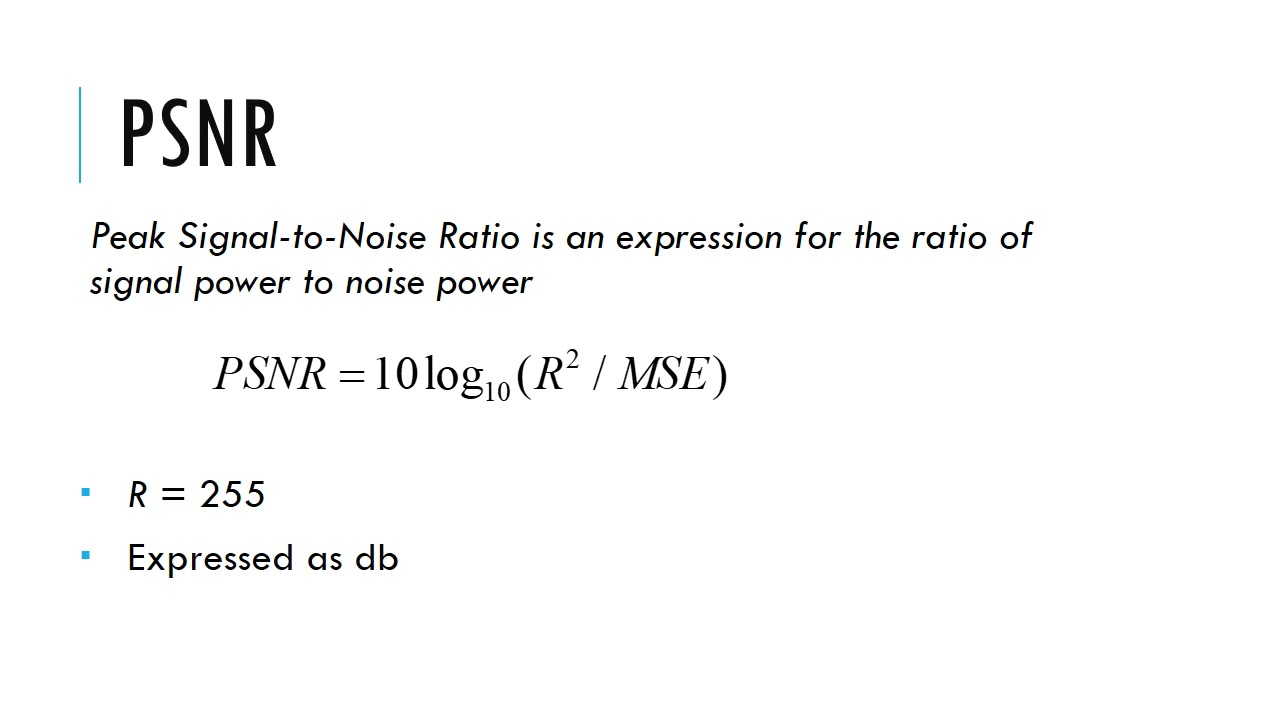



In this code, the PSNR is calculated for the noisy image and the denoised images obtained using BayesShrink and VisuShrink. 

In [59]:
#Finding PSNR 
psnr_noisy = peak_signal_noise_ratio(img,imgn)
psnr_bayes = peak_signal_noise_ratio(img,img_bayes)
psnr_visu = peak_signal_noise_ratio(img,img_visushrink)


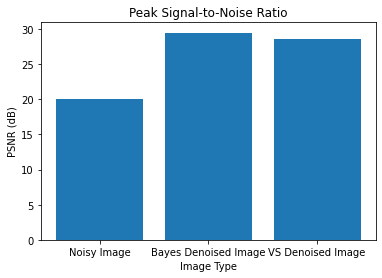

In [60]:
# Define PSNR values
psnr_values = [psnr_noisy, psnr_bayes, psnr_visu]
labels = ['Noisy Image', 'Bayes Denoised Image', 'VS Denoised Image']

# Create bar plot
plt.bar(labels, psnr_values)

# Add title and axis labels
plt.title('Peak Signal-to-Noise Ratio')
plt.xlabel('Image Type')
plt.ylabel('PSNR (dB)')

# Display plot
plt.show()

The results show that the PSNR of the **noisy image** is **lower** than the **denoised images**, indicating that the noise has been **reduced**. The denoised images obtained using **BayesShrink** and **VisuShrink** have **higher** PSNR values than the noisy image, indicating that the image quality has been **improved**.

Based on the PSNR values, we can conclude that both BayesShrink and VisuShrink have effectively **reduced** the noise in the image while preserving its details. However, the BayesShrink method has a higher PSNR value than the VisuShrink method, indicating that it has produced a better-quality denoised image. This is likely due to the BayesShrink method's ability to adaptively adjust the threshold level based on the estimated noise level of the image.

Overall, the results of the denoising and PSNR calculations suggest that wavelet-based denoising can be **an effective technique** for reducing noise in images, and that the **BayesShrink** method may be a better choice for this task.

# Colored Images

We also tried to apply this method for colored images , hence we followed the same approach but with different input:

In [61]:
img = skimage.io.imread("touka.jpg")
img = skimage.img_as_float(img)
sigma = 0.15 #Noise std
imgn = random_noise(img,var= sigma**2)
sigma_est = estimate_sigma(imgn,multichannel=True,average_sigmas=True) #Noise Estimation

<ipython-input-61-25b7805a4d7b>:5: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  sigma_est = estimate_sigma(imgn,multichannel=True,average_sigmas=True) #Noise Estimation


In [62]:
#Denoising using Bayes
img_bayes = denoise_wavelet(imgn,method='BayesShrink',mode ='soft',
                            wavelet_levels=3,wavelet='coif5',
                            multichannel=True,convert2ycbcr=True,
                            rescale_sigma=True)
#Denoising using VisuShrink
img_visushrink = denoise_wavelet(imgn,method='VisuShrink',mode ='soft',
                                 sigma=sigma_est/3,wavelet_levels=5
                                 ,wavelet='coif5',multichannel=True,
                                 convert2ycbcr=True,rescale_sigma=True)


<ipython-input-62-e09ca4295a33>:2: FutureWarning: `multichannel` is a deprecated argument name for `denoise_wavelet`. It will be removed in version 1.0. Please use `channel_axis` instead.
  img_bayes = denoise_wavelet(imgn,method='BayesShrink',mode ='soft',
<ipython-input-62-e09ca4295a33>:7: FutureWarning: `multichannel` is a deprecated argument name for `denoise_wavelet`. It will be removed in version 1.0. Please use `channel_axis` instead.
  img_visushrink = denoise_wavelet(imgn,method='VisuShrink',mode ='soft',
/usr/local/lib/python3.8/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 5 is too high: all coefficients will experience boundary effects.
  warnings.warn(


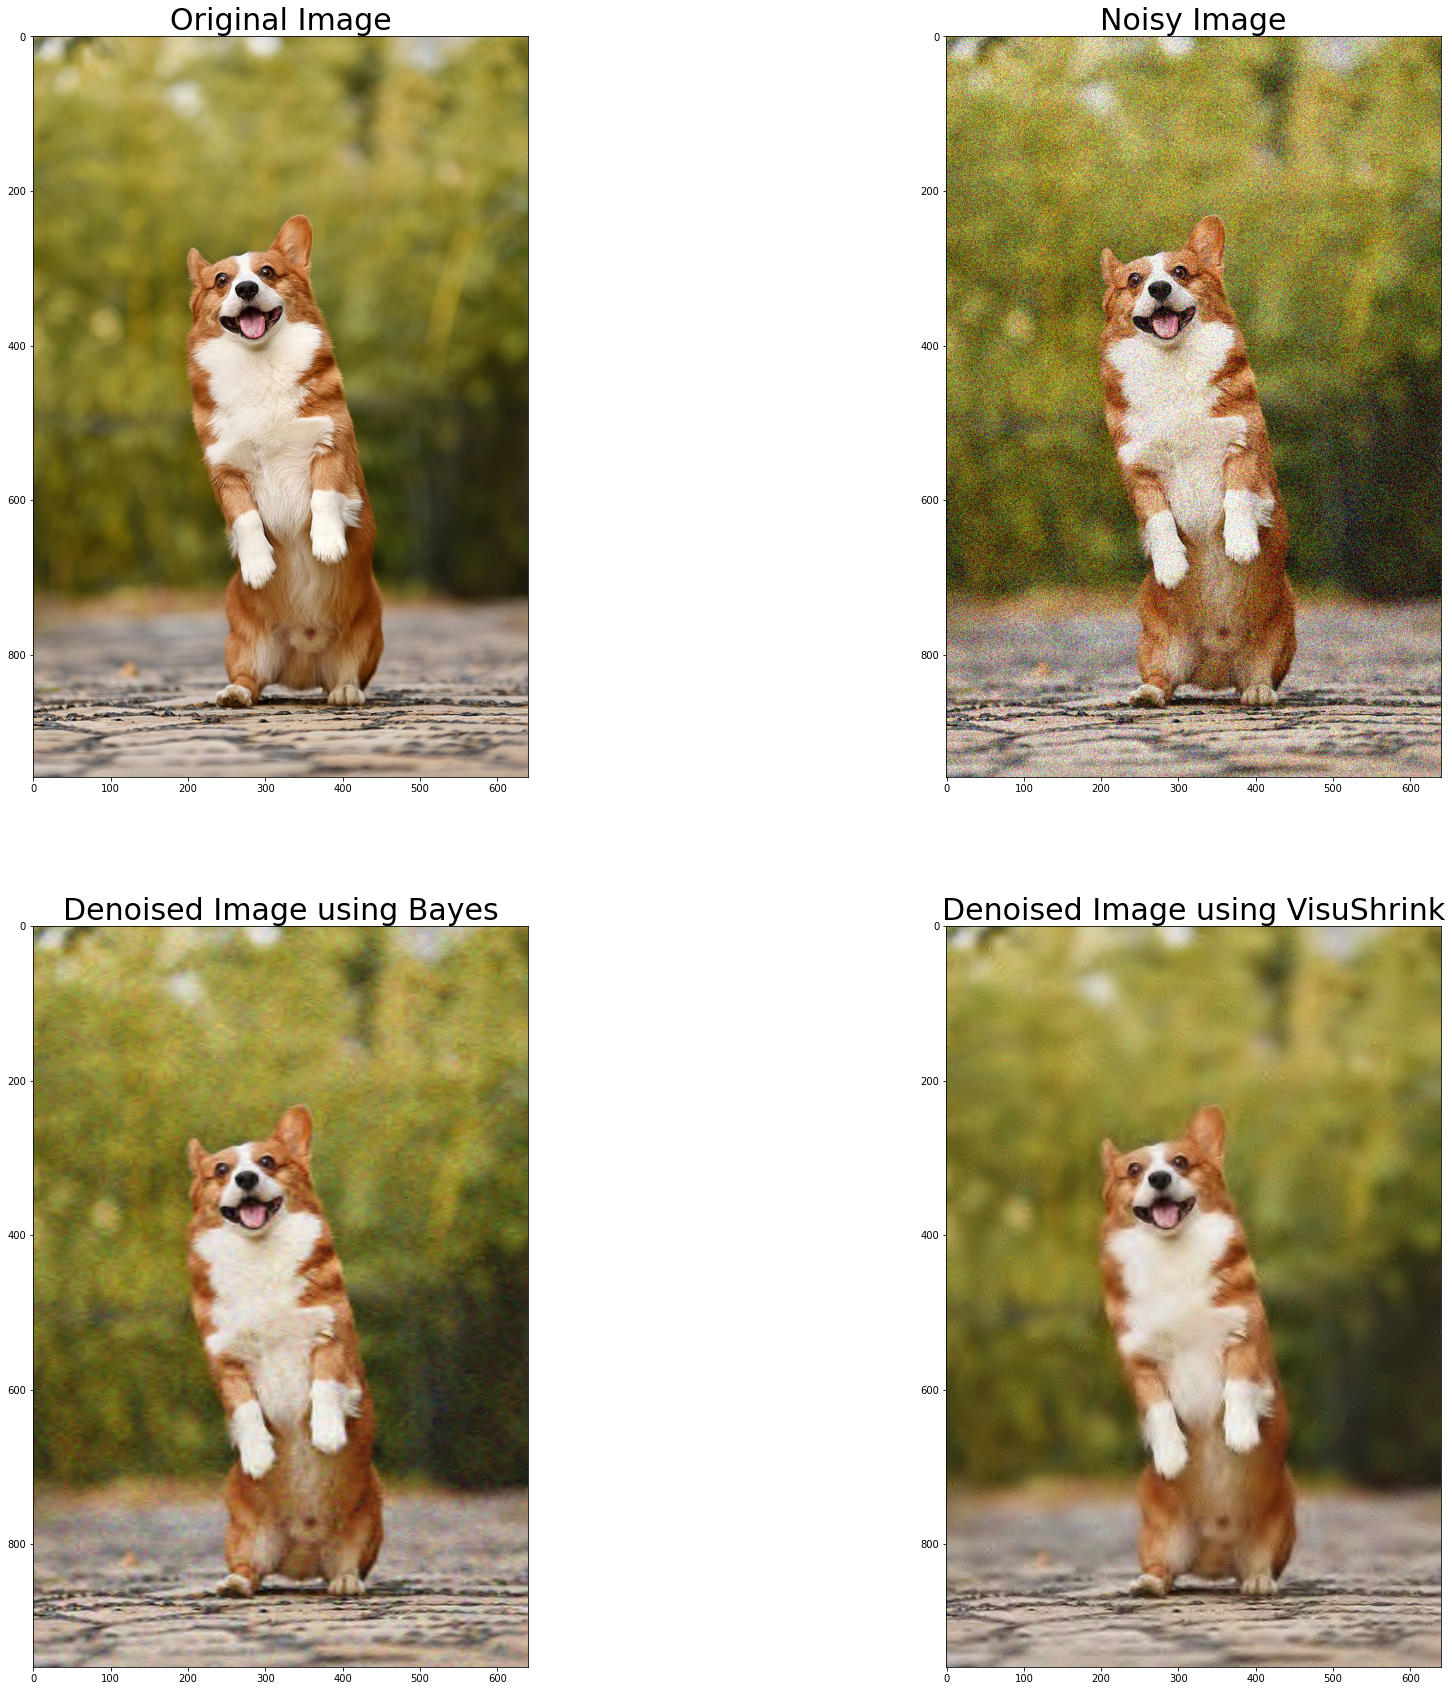

In [63]:
#Plotting Images
plt.figure(figsize=(30,30))

plt.subplot(2,2,1)
plt.imshow(img,cmap=plt.cm.gray)
plt.title('Original Image',fontsize=30)

plt.subplot(2,2,2)
plt.imshow(imgn,cmap=plt.cm.gray)
plt.title('Noisy Image',fontsize=30)

plt.subplot(2,2,3)
plt.imshow(img_bayes,cmap=plt.cm.gray)
plt.title('Denoised Image using Bayes',fontsize=30)

plt.subplot(2,2,4)
plt.imshow(img_visushrink,cmap=plt.cm.gray)
plt.title('Denoised Image using VisuShrink',fontsize=30)

plt.show()


In [64]:
#Finding PSNR 
psnr_noisy_colored = peak_signal_noise_ratio(img,imgn)
psnr_bayes_colored = peak_signal_noise_ratio(img,img_bayes)
psnr_visu_colored = peak_signal_noise_ratio(img,img_visushrink)


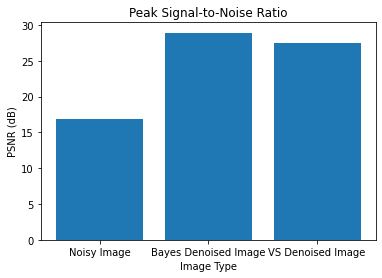

In [65]:
# Define PSNR values
psnr_values = [psnr_noisy_colored, psnr_bayes_colored, psnr_visu_colored]
labels = ['Noisy Image', 'Bayes Denoised Image', 'VS Denoised Image']

# Create bar plot
plt.bar(labels, psnr_values)

# Add title and axis labels
plt.title('Peak Signal-to-Noise Ratio')
plt.xlabel('Image Type')
plt.ylabel('PSNR (dB)')

# Display plot
plt.show()

Similarly to the grayscale images: we can notice that the PSNR using the VisuShrink and BayesShrink techniques is higher than the PSNR for noisy image , we can conclude that the method is also effective for colored type of images.